## 邏輯分類有2種
- LogisticRegression
- LinearSVC

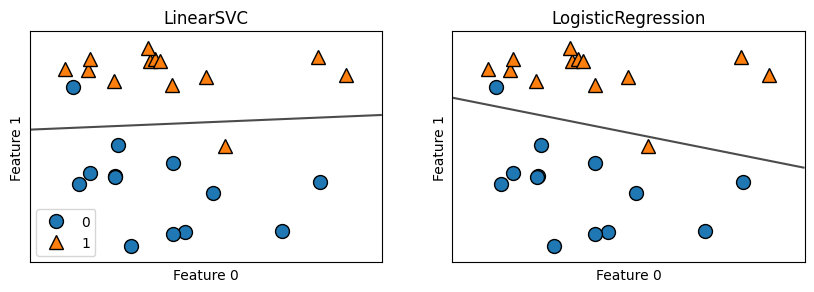

In [ ]:
#畫圖表了解什麼叫分數

import mglearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

## 2個預設都使用L2正規化(Ridge)
- 對於 LogisticRegression 和 LinearSVC，決定正規化強度的權衡參數稱為 C，C 值越高，正規化程度越低
- 當使用較高的參數 C 值時，LogisticRegression 和 LinearSVC 會盡可能地擬合訓練集，而當參數 C 值較低時，模型會更重視尋找接近零的係數向量 (w)。
- 使用較低的C值將導致演算法嘗試適應「大多數」資料點，而使用較高的 C 值會強調對每個單獨的資料點進行分類的重要性。
正確配置。

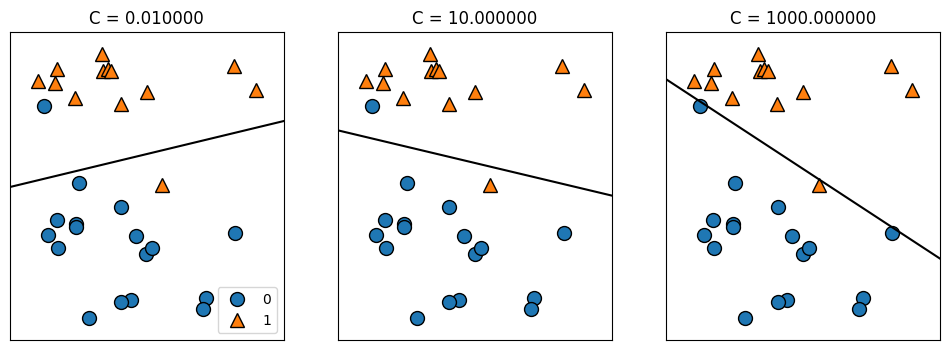

In [9]:
mglearn.plots.plot_linear_svc_regularization()

- 分類的線性模型在低維空間中可能看起來非常嚴格，只允許決策邊界是直線或平面。
- 在高維度中，用於分類的線性模型變得非常強大，並且在考慮更多特徵時，防止過度擬合變得越來越重要。

## 使用特徵比較多的威斯康辛州乳癌資料集

## 說明
max_iter的意思?
1. 優化過程
   - 邏輯迴歸使用梯度下降等優化算法來找到最佳的模型參數
   - 每次迭代都是調整模型參數的一個步驟
   - 目標是最小化損失函數（通常是對數損失）
2. 完整數據集的使用
   - 在每次迭代中，算法都會使用完整的訓練數據集
   - 這表示在一次迭代中，所有訓練樣本都被用來更新模型參數

3. 停止條件
   - 當算法達到收斂（模型參數幾乎不再變化）時會提前停止
   - 如果達到 max_iter 設定的1000次仍未收斂，則強制停止

### `fit_transform()`
- 這個方法會**同時執行兩個步驟**：
  1. **fit (擬合)**：計算訓練數據的統計量（平均值和標準差）
  2. **transform (轉換)**：使用計算出的統計量來標準化數據
- 主要用於**訓練數據集**
- 只能在訓練集上使用一次

### `transform()`
- 只執行**轉換步驟**
- 使用之前 `fit` 時計算好的統計量來進行標準化
- 用於**測試數據集**
- 可以重複使用在不同的數據集上

### 為什麼要這樣區分？
1. **數據洩漏問題**：
   - 如果在測試集上使用 `fit_transform()`，會導致模型看到測試數據的分布，造成數據洩漏
   - 正確做法是只用訓練集的統計量來轉換測試集

2. **一致性**：
   - 確保測試集使用相同的縮放參數
   - 保持訓練集和測試集的轉換標準一致



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Scale the data 將數據進行標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



logreg = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
print("訓練時的分數:{:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("測試時的分數:{:.3f}".format(logreg.score(X_test_scaled, y_test)))

訓練時的分數:0.988
測試時的分數:0.986


In [26]:
## 請整c參數
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Scale the data 將數據進行標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



logreg100 = LogisticRegression(max_iter=1000,C=100).fit(X_train_scaled, y_train)
print("訓練時的分數:{:.3f}".format(logreg100.score(X_train_scaled, y_train)))
print("測試時的分數:{:.3f}".format(logreg100.score(X_test_scaled, y_test)))

訓練時的分數:0.998
測試時的分數:0.944
